In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.metrics import mean_absolute_error, mean_squared_error
pd.set_option('display.max_columns', None) # coluna
pd.set_option('display.max_rows', None) # linha
import missingno as msno
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_predict,
    cross_val_score,
)
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import datetime as dt
import random
from mpl_toolkits.mplot3d import Axes3D


In [2]:
pd.set_option('display.max_columns', None) # coluna
pd.set_option('display.max_rows', None) # linha

In [6]:
df = pd.read_excel(r'C:\Users\99829465\Documents\Merge Squad Roic.xlsx', sheet_name='Sheet1')


In [ ]:
dfs = []

# Nomes dos arquivos Excel (substitua pelos seus nomes)

roadmap = "C:\\Users\\99829465\\Downloads\\"

excel_files = ['CO.xlsx', 'MG.xlsx', 'SP1.xlsx', 'SP2.xlsx', 'SP3.xlsx', 'RJ1.xlsx', 'RJ2.xlsx', 'SU1.xlsx', 'SU2.xlsx','NO.xlsx', 'NE1.xlsx', 'NE2.xlsx']

# Loop para carregar cada planilha em um DataFrame e adicioná-lo à lista
for file in excel_files:
    dfx = pd.read_excel(roadmap + file)  # Carrega a planilha Excel em um DataFrame
    dfs.append(dfx)            # Adiciona o DataFrame à lista

# Concatena os DataFrames da lista em um único DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

C:\Users\99829465\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\99829465\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\99829465\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\99829465\AppData\Local\Pa

In [ ]:
df_merged = pd.merge(df,combined_df,left_on ='UNB_PDV',right_on='key_unb_pdv',how='left').reset_index()

In [21]:
print(df.shape)
print(combined_df.shape)
print(df_merged.shape)



(503368, 32)
(1349939, 39)
(503368, 72)


In [22]:
df_merged.to_excel(r'Merge Squad Roic.xlsx', index = False)

In [305]:
lista_geo = df['GEO'].unique()
lista_geo

array(['Geo CO', 'Geo MG', 'Geo NE', 'Geo NO', 'Geo RJ/ES', 'Geo SP',
       'Geo SUL'], dtype=object)

In [306]:
lista_seg = df['Segmento'].unique()
lista_seg

array(['CENTRAL', 'SUB', 'TRAD', 'VIP', 'Rota', 'AS Rota', 'OUTROS'],
      dtype=object)

In [48]:
df_tratado = df[df['Fat. c/ ADF'] > 0]
df_tratado = df_tratado[df_tratado['GEO']=='Geo CO']
df_tratado = df_tratado[df_tratado['Segmento']=='VIP']
df_tratado.head()

,index,GEO,Comercial,CDD,UNB_PDV,# Cliente,Segmento,Cluster CP,Prazo máximo,Taxa Cadastrada,Fat. Total,Fat. Total à vista,Fat. a prazo,Fat. à prazo s/ ADF,Fat. c/ ADF,Receita ADF,PMP,PMP c/ ADF,PMP s/ ADF,Taxa média,Taxa efetiva,# Titulos pago em atraso,# Titulos pago c/ juros,# Titulos pago c/ multa,Receita Multas Liquida,Receita Juros Liquida,Prazo Isento,Flag,% Fat a vista,% Fat S/ ADF,% Fat C/ ADF,ADF/TTV,Lista de Restrição,key_op_pdv,key_unb_pdv,Filial,Cód PDV,Nome Fantasia,Documento,Tipo de Pessoa,Data de Cadastro,Status Documentação,Cód EG,Cód Rede,Nome Rede,Segmento NGE,Classe Risco Atual,Chance de Pagamento,Lista de restrição,Motivo Lista Restrição,PDV Duplicado?,Prazo Promax (Dig. Manual),Prazo Atual Total,Maior Prazo Isento,Taxa do Maior Prazo,Limite de Crédito Atual,Soma de Limite de Crédito Usado,Limite Disponível,Faturamento à Prazo (Mês),Soma de Faturamento DH (Mês),Faturamento Total (M-1),Faturamento DH (M-1),Média Faturamento(3 meses),Titulos Pendentes,Perc de atraso,Atraso Médio,Notas em Aberto,Pendência BeesBank,Soma de Acumulado de Vendas,Prazo Matriz,Taxa Matriz - Visão Cliente,Limite de Crédito Sugerido
6,6,Geo CO,Com MT Centro,CDD CUIABA,455_10007,1,VIP,70%-80%,5,0.1132,52277.55,0.0,52277.55,0.0,52277.55,909.35,5.253306,4.732708,0.0,0.115477,0.017395,0,0,0,0.0000,0.0000,0.0,0,0.0,0.0,1.0,0.017395,N,CUIABA[10007]VICTOR JORGE LEITE C,455_10007,455.0,10007.0,VICTOR JORGE LEITE C,28.102.714/0001-20,Juridica,2017-07-26,Sim,NaN,0.0,NaN,VIP,3.0,0.88,Não,NaN,Não,14.0,14.0,0.0,0.0989,19092.0,5488.41,13603.59,18699.29,0.0,17484.71,0.0,17508.85,0.0,0.065217,0.0,NaN,0.0,59113.85,5.0,0.080,6216.0
27,27,Geo CO,Com MT Centro,CDD CUIABA,455_10148,1,VIP,80%-90%,4,0.1126,32129.63,0.0,32129.63,0.0,32129.63,466.57,4.440000,4.000000,0.0,0.114200,0.014521,3,3,3,70.4583,18.2952,0.0,0,0.0,0.0,1.0,0.014521,N,CUIABA[10148]KIKIO FAST FOOD,455_10148,455.0,10148.0,KIKIO FAST FOOD,14.686.291/0001-28,Juridica,2017-08-30,Sim,NaN,0.0,NaN,VIP,6.0,0.58,Não,NaN,Não,4.0,4.0,0.0,0.1230,10228.0,0.00,10228.00,0.00,0.0,12713.87,0.0,11982.35,0.0,0.092593,0.0,NaN,0.0,29923.20,0.0,0.085,0.0
38,38,Geo CO,Com MT Centro,CDD CUIABA,455_10196,1,VIP,80%-90%,10,0.1026,3516.33,0.0,3516.33,0.0,3516.33,80.10,7.270667,6.550150,0.0,0.108475,0.022779,1,1,1,5.3815,0.3448,0.0,0,0.0,0.0,1.0,0.022779,N,CUIABA[10196]Vale dos Ventos,455_10196,455.0,10196.0,Vale dos Ventos,28.135.385/0001-13,Juridica,2017-09-12,Sim,NaN,0.0,NaN,VIP,4.0,0.70,Não,NaN,Não,21.0,21.0,0.0,0.1106,1560.0,1116.33,443.67,1116.33,0.0,1445.36,0.0,1172.11,0.0,0.066667,0.0,NaN,0.0,3731.18,4.0,0.085,1239.0
40,40,Geo CO,Com MT Centro,CDD CUIABA,455_10231,1,VIP,80%-90%,7,0.1027,2977.02,0.0,2977.02,0.0,2977.02,77.29,7.770000,7.000000,0.0,0.116098,0.025962,0,0,0,0.0000,0.0000,0.0,0,0.0,0.0,1.0,0.025962,N,CUIABA[10231]RESTAURANTE AVENIDA,455_10231,455.0,10231.0,RESTAURANTE AVENIDA,08.783.162/0001-55,Juridica,2017-09-20,Sim,NaN,0.0,NaN,VIP,6.0,0.85,Não,NaN,Não,8.0,8.0,0.0,0.1230,2023.0,0.00,2023.00,0.00,0.0,873.43,0.0,1283.48,0.0,0.000000,0.0,NaN,0.0,3216.14,0.0,0.085,0.0
103,103,Geo CO,Com MT Centro,CDD CUIABA,455_10690,1,VIP,80%-90%,6,0.1076,1266.95,0.0,1266.95,0.0,1266.95,5.68,1.288203,1.160543,0.0,0.122485,0.004483,0,0,0,0.0000,0.0000,0.0,0,0.0,0.0,1.0,0.004483,N,CUIABA[10690]PM DAMASCENO TRANSPO,455_10690,455.0,10690.0,PM DAMASCENO TRANSPO,08.109.435/0001-80,Juridica,2018-01-11,Sim,NaN,0.0,NaN,VIP,2.0,0.74,Não,NaN,Não,21.0,21.0,0.0,0.1106,1750.0,0.00,1750.00,655.78,0.0,617.28,0.0,422.31,0.0,0.000000,0.0,NaN,0.0,1808.27,5.0,0.090,875.0


In [49]:
df_roic = df_tratado[['UNB_PDV','GEO','Segmento','Comercial','PMP c/ ADF','PMP s/ ADF','Taxa média','ADF/TTV','Prazo Isento','Chance de Pagamento','Classe Risco Atual','Perc de atraso','Lista de Restrição','% Fat C/ ADF']]
df_roic = df_roic.fillna(0)
df_roic = df_roic[df_roic['Taxa média'] < 0.3]
df_roic['Lista de Restrição'] = df_roic['Lista de Restrição'].map({'S': 1, 'N': 0})
df_roic.head() #parei aq


,UNB_PDV,GEO,Segmento,Comercial,PMP c/ ADF,PMP s/ ADF,Taxa média,ADF/TTV,Prazo Isento,Chance de Pagamento,Classe Risco Atual,Perc de atraso,Lista de Restrição,% Fat C/ ADF
6,455_10007,Geo CO,VIP,Com MT Centro,4.732708,0.0,0.115477,0.017395,0.0,0.88,3.0,0.065217,0,1.0
27,455_10148,Geo CO,VIP,Com MT Centro,4.000000,0.0,0.114200,0.014521,0.0,0.58,6.0,0.092593,0,1.0
38,455_10196,Geo CO,VIP,Com MT Centro,6.550150,0.0,0.108475,0.022779,0.0,0.70,4.0,0.066667,0,1.0
40,455_10231,Geo CO,VIP,Com MT Centro,7.000000,0.0,0.116098,0.025962,0.0,0.85,6.0,0.000000,0,1.0
103,455_10690,Geo CO,VIP,Com MT Centro,1.160543,0.0,0.122485,0.004483,0.0,0.74,2.0,0.000000,0,1.0


Pre-processamento

In [50]:
nrm_scaler = MinMaxScaler()
nume = df_roic[['PMP c/ ADF']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )
df_roic['PMP c/ ADF_norm'] = df_scaled
#df_roic = df_roic.drop(columns = 'PMP c/ ADF')

nrm_scaler = MinMaxScaler()
nume = df_roic[['Taxa média']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )

df_roic['Taxa média_norm'] = df_scaled

nrm_scaler = MinMaxScaler()
nume = df_roic[['ADF/TTV']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )

df_roic['ADF/TTV_norm'] = df_scaled

nrm_scaler = MinMaxScaler()
nume = df_roic[['PMP s/ ADF']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )

df_roic['PMP s/ ADF_norm'] = df_scaled

nrm_scaler = MinMaxScaler()
nume = df_roic[['Prazo Isento']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )

df_roic['Prazo Isento_norm'] = df_scaled

nrm_scaler = MinMaxScaler()
nume = df_roic[['Chance de Pagamento']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )

df_roic['Chance de Pagamento_norm'] = df_scaled

nrm_scaler = MinMaxScaler()
nume = df_roic[['Classe Risco Atual']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )

df_roic['Classe Risco Atual_norm'] = df_scaled

nrm_scaler = MinMaxScaler()
nume = df_roic[['Perc de atraso']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )

df_roic['Perc de atraso_norm'] = df_scaled

nrm_scaler = MinMaxScaler()
nume = df_roic[['Lista de Restrição']]
colunas = nume.columns
df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns= colunas )

df_roic['Lista de Restrição_norm'] = df_scaled

print('Variaveis normalizadas')



Variaveis normalizadas


In [51]:
identificadores = df_roic['GEO']
X = df_roic[['Taxa média_norm', 'PMP c/ ADF_norm']]
y = df_roic['% Fat C/ ADF']

Correlação e Histogramas

In [19]:
binary_var = df_roic.select_dtypes(include=['object', 'bool']).nunique()[df_roic.nunique() == 2].keys().tolist()
num_cols = [col for col in df_roic.select_dtypes(exclude=['object', 'bool','datetime64[ns]']).columns.tolist()]
cat_cols = [col for col in df_roic.select_dtypes(include=['object', 'bool','datetime64[ns]']).columns.tolist() if col not in num_cols+binary_var]

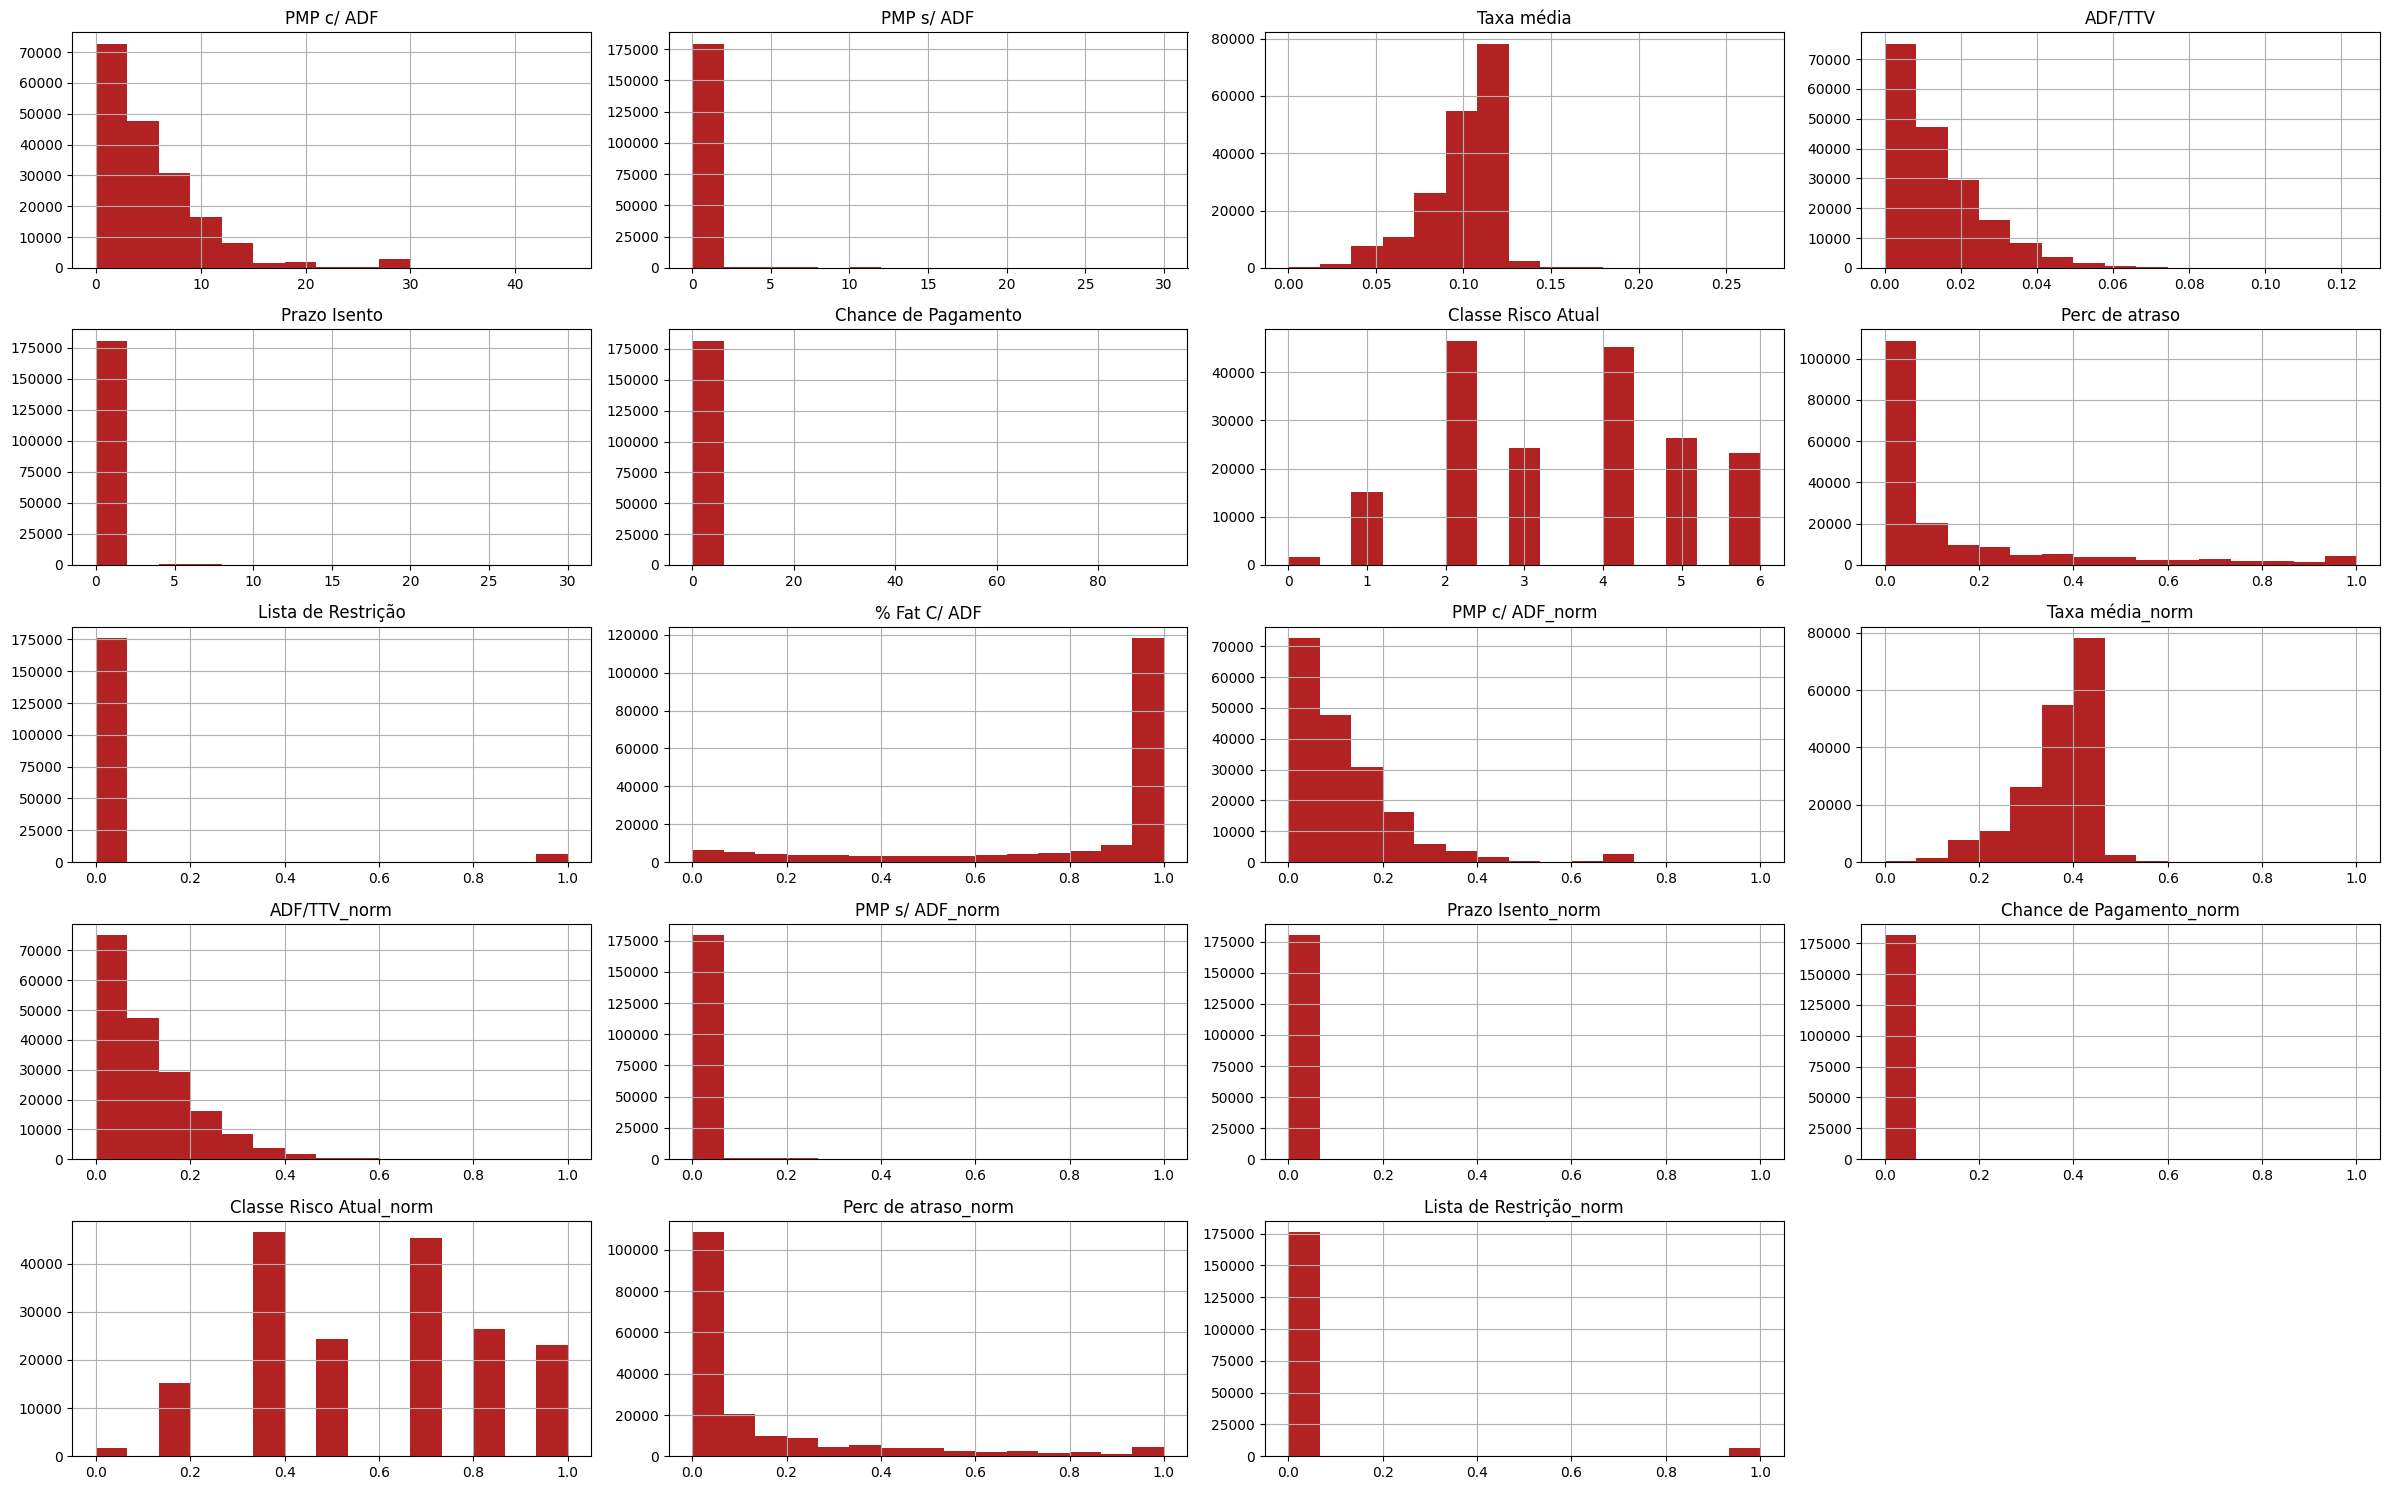

In [20]:
df_roic[num_cols].hist(bins=15, figsize=(24, 15), color='firebrick')
plt.tight_layout()
plt.show()

<Axes: >

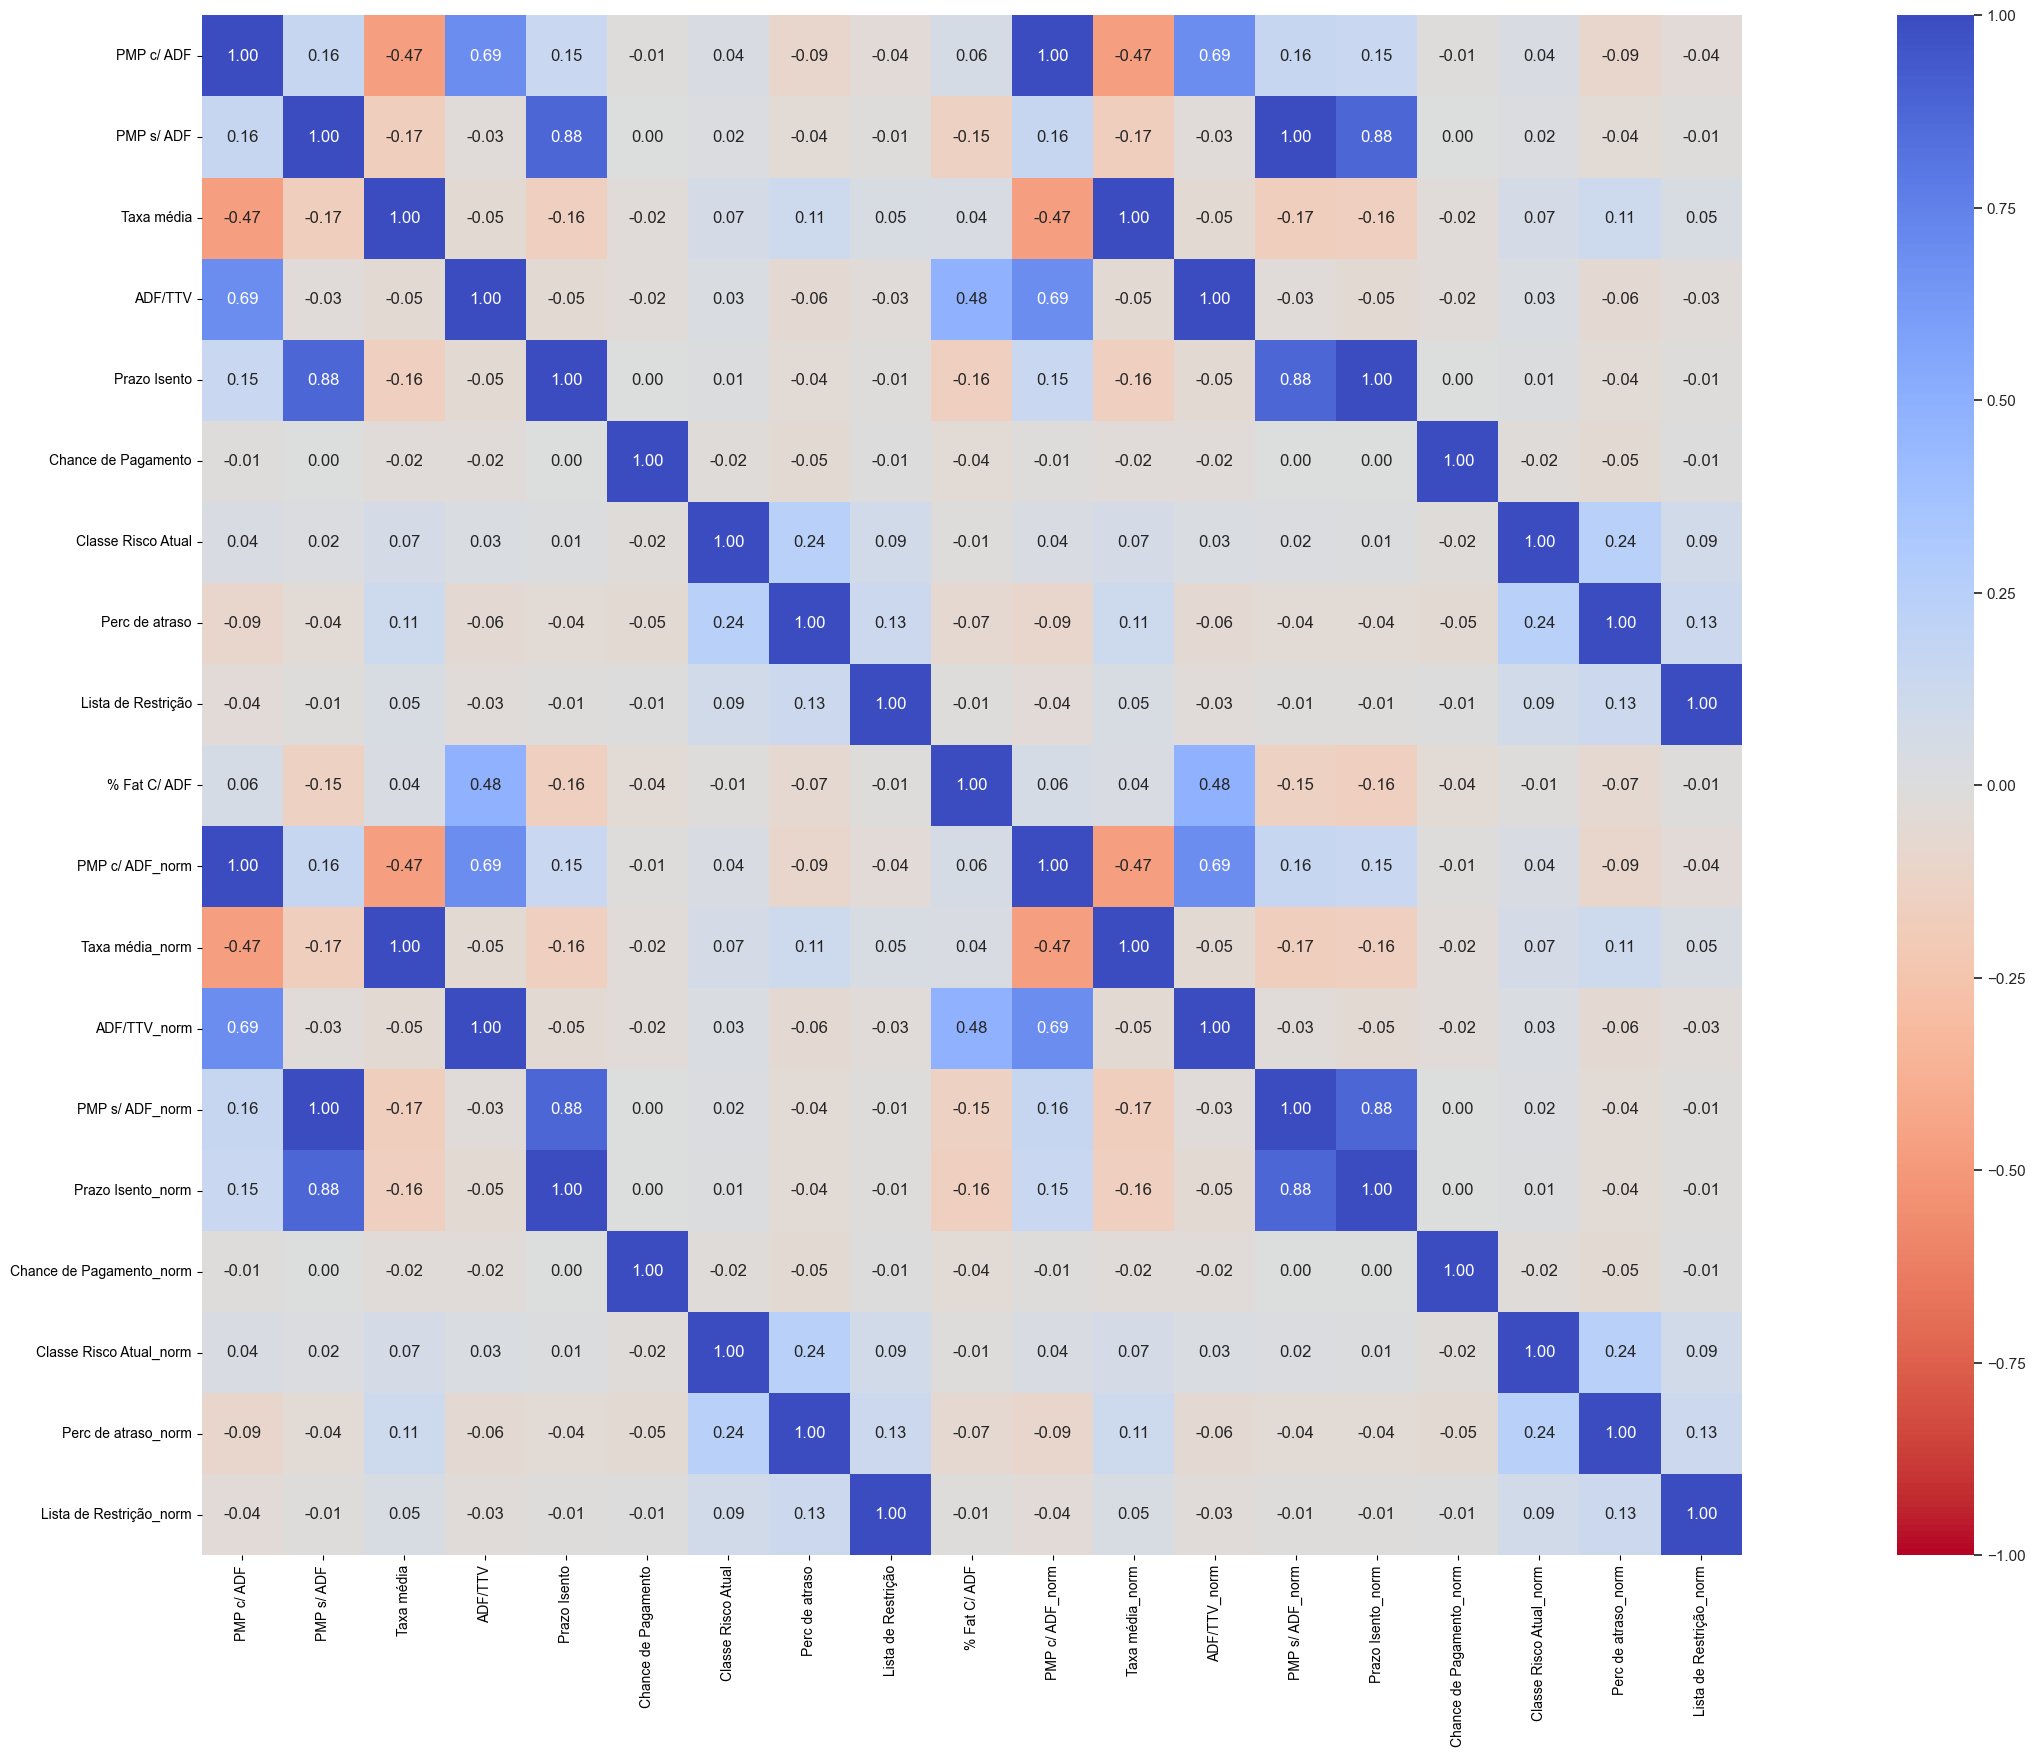

In [21]:
fig, ax = plt.subplots(figsize=(40, 20))

corr = df_roic.select_dtypes(include=np.number).corr()
# mask = np.zeros_like(corr).diagonal()
# mask[np.triu_indices_from(mask)] = True
sns.set(rc={'axes.facecolor':'#f5e003', 'figure.facecolor':'#f5e003'})

sns.heatmap(
    corr, annot=True, fmt=".2f", ax=ax, square=True, cmap="coolwarm_r", vmin=-1, vmax=1
) 

In [52]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [53]:
X = df_roic[['Taxa média_norm', 'PMP c/ ADF_norm','ADF/TTV_norm','PMP s/ ADF_norm','Prazo Isento_norm','Chance de Pagamento_norm','Classe Risco Atual_norm','Perc de atraso_norm','Lista de Restrição_norm']]
y = df_roic['% Fat C/ ADF']

In [54]:
X_train, X_test , y_train ,y_test = train_test_split(X,y,random_state =0)

In [55]:
modelo.fit(X_train, y_train)

LinearRegression()

In [56]:
yhat = modelo.predict(X_test)

In [57]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': yhat.squeeze()})
df_preds.head()

,Actual,Predicted
9338,1.000000,0.985676
13310,1.000000,0.806763
21208,1.000000,0.947058
6193,0.995882,0.911329
10877,0.989204,0.684243


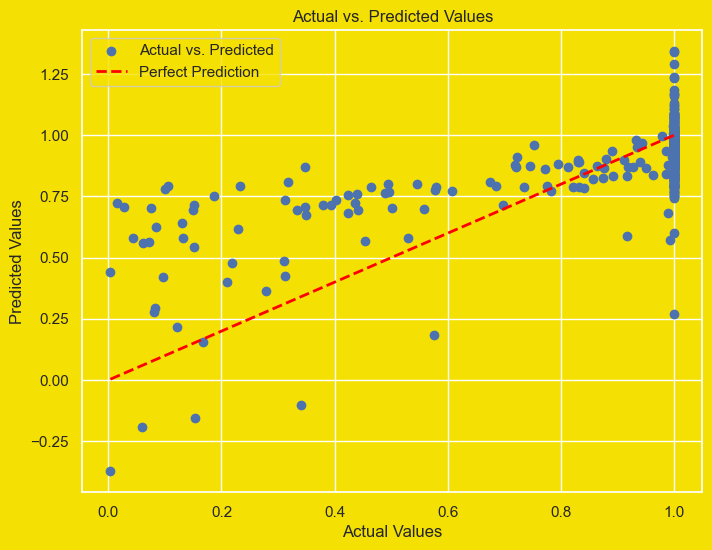

In [58]:
Y_actual = df_preds['Actual']
Y_predicted = df_preds['Predicted']
plt.figure(figsize=(8, 6))
plt.scatter(Y_actual, Y_predicted, c='b', label='Actual vs. Predicted')

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(Y_actual), max(Y_actual)], [min(Y_actual), max(Y_actual)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

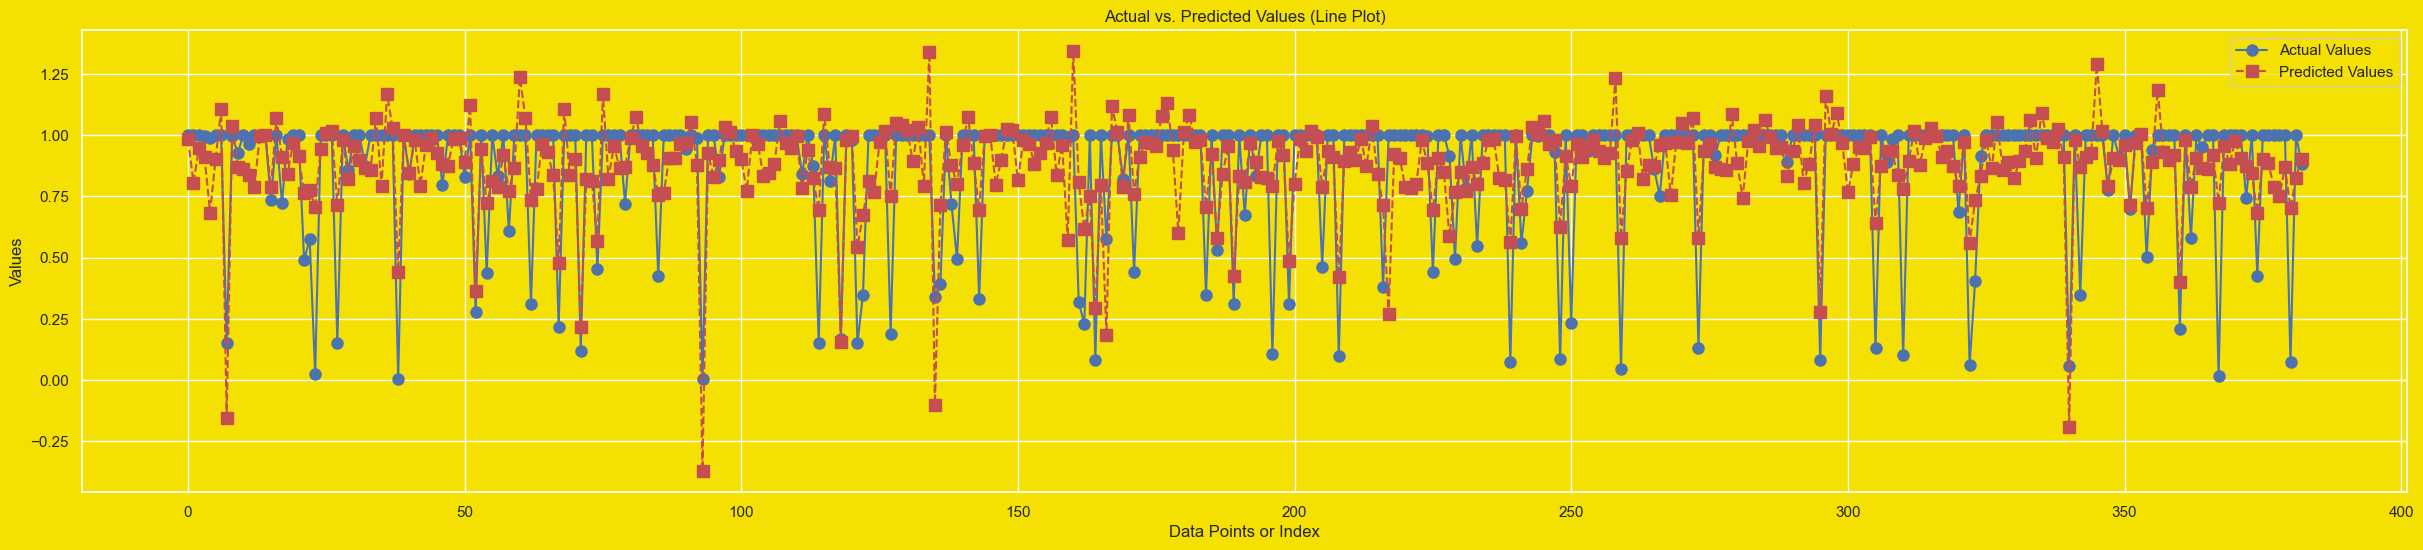

In [60]:
data_points = np.arange(len(Y_actual))

# Create a line plot for actual and predicted values
plt.figure(figsize=(30, 6))
plt.plot(data_points, Y_actual, marker='o', linestyle='-', color='b', label='Actual Values', markersize=8)
plt.plot(data_points, Y_predicted, marker='s', linestyle='--', color='r', label='Predicted Values', markersize=8)

plt.xlabel('Data Points or Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

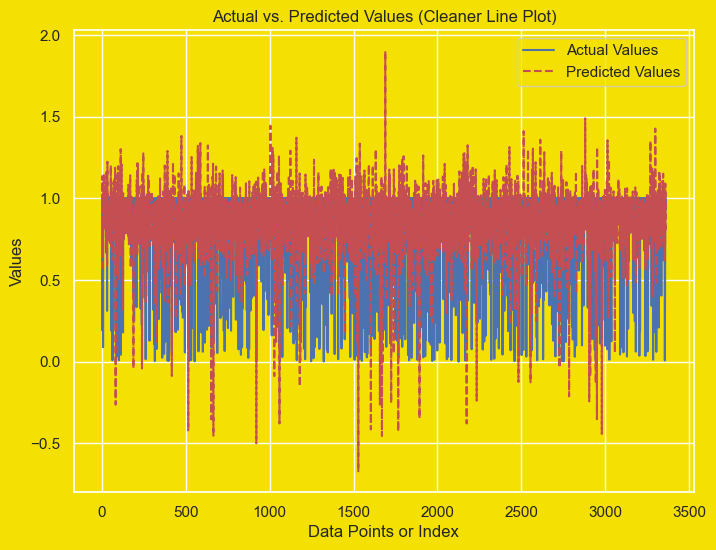

In [47]:
data_points = np.arange(len(Y_actual))

# Create a cleaner line plot for actual values
plt.figure(figsize=(8, 6))
plt.plot(data_points, Y_actual, label='Actual Values', color='b')

# Create a cleaner line plot for predicted values
plt.plot(data_points, Y_predicted, label='Predicted Values', color='r', linestyle='--')

plt.xlabel('Data Points or Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Cleaner Line Plot)')
plt.legend()
plt.grid(True)
plt.show()

In [283]:
novos_dados = pd.DataFrame({'Taxa média_norm': [0.075217, 0.0463],'PMP c/ ADF_norm': [0.085, 0.064228] })
previsao_faturamento = modelo.predict(novos_dados)

print(previsao_faturamento)

[0.71411077 0.69925889]


In [284]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f} - Erro médio das previsões')
print(f'Mean squared error: {mse:.2f} - Erro médio quadratico (da mais peso para erros maiores, e menos pra erros pequenos e numerosos)')
print(f'Root mean squared error: {rmse:.2f} - Indica o maior erro, o valor mais distante previsto')

Mean absolute error: 0.24 - Erro médio das previsões
Mean squared error: 0.09 - Erro médio quadratico (da mais peso para erros maiores, e menos pra erros pequenos e numerosos)
Root mean squared error: 0.30 - Indica o maior erro, o valor mais distante previsto


In [285]:
feature_names = X.columns
model_coefficients = modelo.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                 Coefficient value
Taxa média_norm           0.323681
PMP c/ ADF_norm           0.264395


Valor otimizado

In [286]:
limit1 = min(df_roic['PMP c/ ADF_norm'])
limit2 = max(df_roic['PMP c/ ADF_norm'])
limit3 = min(df_roic['Taxa média_norm'])
limit4 = max(df_roic['Taxa média_norm'])
print(limit1,limit2)
print(limit3,limit4)

0.0 1.0
0.0 1.0


In [295]:
import random

# Criar uma lista de dicionários com combinações aleatórias
data = []
for _ in range(100000):
    data.append({
        'Taxa média_norm': random.uniform(limit3, limit4),
        'PMP c/ ADF_norm': random.uniform(limit1, limit2),
        
    })

# Criar o DataFrame a partir da lista de dicionários
df_teste = pd.DataFrame(data)


In [296]:
yhat = modelo.predict(df_teste)


In [297]:
df_plot = df_teste
df_plot['Previsões'] = yhat
df_plot = df_plot[df_plot['Previsões']<1]

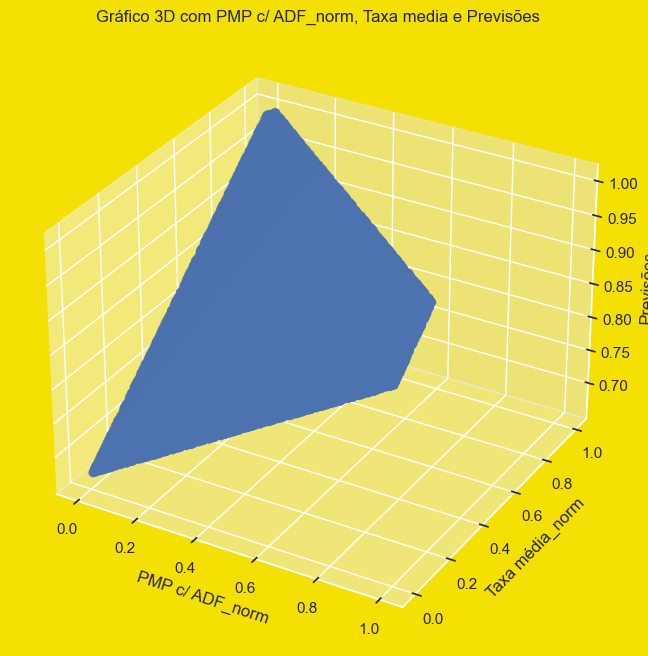

In [298]:
from mpl_toolkits.mplot3d import Axes3D
# Plotar o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_plot['PMP c/ ADF_norm'], df_plot['Taxa média_norm'], df_plot['Previsões'], c='b', marker='o')
ax.set_xlabel('PMP c/ ADF_norm')
ax.set_ylabel('Taxa média_norm')
ax.set_zlabel('Previsões')
ax.set_title('Gráfico 3D com PMP c/ ADF_norm, Taxa media e Previsões')
plt.show()

In [301]:
df_top50 = df_plot.nlargest(50, 'Previsões')

a = min(df_roic['Taxa média'])
b = max(df_roic['Taxa média'])

c = min(df_roic['PMP c/ ADF'])
d = max(df_roic['PMP c/ ADF'])

def min_max_inverse(normalized_list, original_min, original_max):
    denormalized_list = [(x * (original_max - original_min)) + original_min for x in normalized_list]
    return denormalized_list

In [302]:
df_top50['Taxa média'] = min_max_inverse(df_top50['Taxa média_norm'], a, b)
df_top50['PMP c/ ADF'] = min_max_inverse(df_top50['PMP c/ ADF_norm'], c, d)

In [304]:
df_top50.to_excel(r'50 maiores fat c adf.xlsx', index = False)

In [309]:
GEO='co'
j='sub'
print("GEO: ", i ,"\n Segmento:",j, " ok.")

GEO:  co 
 Segmento: sub  ok.


In [310]:
df_top50.to_excel(r'50 maiores fat c adf - '+GEO+"-"+filter+'.xlsx', index = False)

A partir daqui são testes de deteccção de perfil

In [6]:
df_gabarito=pd.read_excel("Base resumo.xlsx")
df_gabarito = df_gabarito.drop_duplicates()
df_gabarito.head()

,GEO,Segmento,Tipo de Pessoa,Taxa Média Otimizada,PMP c/ ADF Otimizado,ADF/TTV otimizado,PMP s/ ADF,Prazo Isento,Chance de Pagamento,Classe Risco Atual,Perc de atraso,Lista de Restrição,% de Faturamento Médio esperado
0,Geo CO,TRAD,Juridica,0.111563,14.412945,0.041626,0.399839,7.323486,0.515209,3.346511,0.522727,0.491099,0.999438
2,Geo CO,TRAD,Fisica,0.089652,14.449553,0.043802,0.465974,3.247558,0.549816,3.620970,0.543082,0.502535,0.999554
5,Geo CO,VIP,Juridica,0.079775,16.485675,0.047913,0.488953,11.908204,0.493001,3.733643,0.512421,0.562246,0.999638
9,Geo CO,VIP,Fisica,0.077179,11.922259,0.040221,0.500974,1.030788,0.452635,4.265477,0.536690,0.555896,0.999622
14,Geo CO,SUB,Fisica,0.056182,12.172035,0.026888,0.453715,1.036924,0.529659,3.479103,0.461660,0.405181,0.999486


In [138]:
df_isentos = pd.read_excel(r"C:\Users\99829465\Downloads\Base isentos.xlsx",)
df_isentos.head()

,#,GEO,CDD,Key UNB,Nome Fantasia,Setor VDE,GV VDE,Cód Rede,Nome Rede,Prazo Contrato Nacional,Segmento NGE,Tipo de Pessoa,Prazo Atual,ADF,PMP Isento,Capital Isento,Capital Não Isento,Prazo Extensão de Prazo (c/ADF),Taxa Extensão Atual,% Isento do Capital Investido Total,Faturamento Médio,Tempo Cadastro,Tempo Última Compra,Chance de Pgto,Classe de Risco
0,1,Geo CO,CDD CUIABA,455_12592,CENTRAL DAS BEBIDAS/,96.0,5.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,13.0,S,12.972425,2.850332e+06,NaN,15.0,0.0,1.000000,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.83,4.0
1,1,Geo CO,CDD CUIABA,455_12587,CENTRAL DAS BEBIDAS/,91.0,5.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,13.0,S,13.000000,2.396177e+06,2405.585,15.0,0.0,0.998997,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.73,1.0
2,1,Geo NO,CDD MARABA,292_3299,CENTRAL DAS BEBIDAS/,90.0,7.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,7.0,S,7.000000,1.914007e+06,NaN,7.0,0.0,1.000000,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.87,2.0
3,1,Geo NE,CDD VIT DA CONQUISTA,671_27562,CENTRAL DAS BEBIDAS/,93.0,9.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,14.0,S,14.000000,1.879231e+06,NaN,30.0,0.0,1.000000,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.93,3.0
4,1,Geo CO,CDD CUIABA,455_12728,CENTRAL DAS BEBIDAS/,94.0,5.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,10.0,S,10.000000,1.354245e+06,NaN,15.0,0.0,1.000000,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.90,2.0


In [160]:
teste_ab = pd.merge(df_isentos,combined_df,left_on ='Key UNB',right_on='key_unb_pdv',how='left',suffixes=['','_r']).reset_index()

teste_ab.head()

,index,#,GEO,CDD,Key UNB,Nome Fantasia,Setor VDE,GV VDE,Cód Rede,Nome Rede,Prazo Contrato Nacional,Segmento NGE,Tipo de Pessoa,Prazo Atual,ADF,PMP Isento,Capital Isento,Capital Não Isento,Prazo Extensão de Prazo (c/ADF),Taxa Extensão Atual,% Isento do Capital Investido Total,Faturamento Médio,Tempo Cadastro,Tempo Última Compra,Chance de Pgto,Classe de Risco,key_op_pdv,key_unb_pdv,Filial,Cód PDV,Nome Fantasia_r,Documento,Tipo de Pessoa_r,Data de Cadastro,Status Documentação,Cód EG,Cód Rede_r,Nome Rede_r,Segmento NGE_r,Classe Risco Atual,Chance de Pagamento,Lista de restrição,Motivo Lista Restrição,PDV Duplicado?,Prazo Promax (Dig. Manual),Prazo Atual Total,Maior Prazo Isento,Taxa do Maior Prazo,Limite de Crédito Atual,Soma de Limite de Crédito Usado,Limite Disponível,Faturamento à Prazo (Mês),Soma de Faturamento DH (Mês),Faturamento Total (M-1),Faturamento DH (M-1),Média Faturamento(3 meses),Titulos Pendentes,%títulos em atraso,Atraso Médio,Notas em Aberto,Pendência BeesBank,Soma de Acumulado de Vendas,Prazo Matriz,Taxa Matriz - Visão Cliente,Limite de Crédito Sugerido
0,0,1,Geo CO,CDD CUIABA,455_12592,CENTRAL DAS BEBIDAS/,96.0,5.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,13.0,S,12.972425,2.850332e+06,NaN,15.0,0.0,1.000000,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.83,4.0,CUIABA[12592]CENTRAL DAS BEBIDAS/,455_12592,455.0,12592.0,CENTRAL DAS BEBIDAS/,32.336.795/0001-08,Juridica,2019-01-18 00:00:00,Sim,87478-7-E,1504.0,CENTRAL DAS BEBIDAS,CENTRAL,4.0,0.43,Não,NaN,Não,13.0,15.0,13.0,0.0553,3350371.0,2582960.04,767410.96,2858363.42,0.0,6838184.33,0.00,6641200.90,0.0,0.001965,0.0,40035; 242809; 512603; 505737; 843699; 848407;...,0.0,18780641.33,0.0,0.0600,0.0
1,1,1,Geo CO,CDD CUIABA,455_12587,CENTRAL DAS BEBIDAS/,91.0,5.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,13.0,S,13.000000,2.396177e+06,2405.585,15.0,0.0,0.998997,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.73,1.0,CUIABA[12587]CENTRAL DAS BEBIDAS/,455_12587,455.0,12587.0,CENTRAL DAS BEBIDAS/,32.302.934/0001-74,Juridica,2019-01-17 00:00:00,Sim,87457-4-E,1504.0,CENTRAL DAS BEBIDAS,CENTRAL,1.0,0.10,Não,NaN,Não,13.0,15.0,13.0,0.0699,6350000.0,3185440.22,3164559.78,3919897.05,0.0,5594649.91,0.00,6754090.87,0.0,0.014631,0.0,50891; 134938; 134939; 208326; 418664; 473509;...,0.0,19047238.86,0.0,0.0600,0.0
2,2,1,Geo NO,CDD MARABA,292_3299,CENTRAL DAS BEBIDAS/,90.0,7.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,7.0,S,7.000000,1.914007e+06,NaN,7.0,0.0,1.000000,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.87,2.0,MARABA[3299]CENTRAL DAS BEBIDAS/,292_3299,292.0,3299.0,CENTRAL DAS BEBIDAS/,26.577.556/0001-39,Juridica,2016-12-01 00:00:00,Sim,81204-8-E,1504.0,CENTRAL DAS BEBIDAS,CENTRAL,2.0,0.86,Não,NaN,Não,7.0,7.0,7.0,0.0000,2020000.0,1853660.28,166339.72,6002311.05,0.0,9178875.14,0.00,8976991.32,0.0,0.009615,0.0,565932,0.0,26749832.46,3.0,0.0425,1000000.0
3,3,1,Geo NE,CDD VIT DA CONQUISTA,671_27562,CENTRAL DAS BEBIDAS/,93.0,9.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,14.0,S,14.000000,1.879231e+06,NaN,30.0,0.0,1.000000,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.93,3.0,VIT DA CONQUISTA[27562]CENTRAL DAS BEBIDAS/,671_27562,671.0,27562.0,CENTRAL DAS BEBIDAS/,10.910.876/0001-29,Juridica,2009-06-23 00:00:00,Sim,83026-7-E,1504.0,CENTRAL DAS BEBIDAS,CENTRAL,3.0,0.92,Não,NaN,Não,14.0,30.0,14.0,0.0640,2857000.0,2280858.26,576141.74,2729194.61,2935.8,3019432.42,835.56,3642791.78,0.0,0.000330,0.0,615982; 615983; 615984; 615985; 615986; 615987...,0.0,15960344.15,0.0,0.0475,1000000.0
4,4,1,Geo CO,CDD CUIABA,455_12728,CENTRAL DAS BEBIDAS/,94.0,5.0,1504.0,CENTRALDASBEBIDAS,7,CENTRAL,Juridica,10.0,S,10.000000,1.354245e+06,NaN,15.0,0.0,1.000000,F) > 100.000,D) Mais de 3 anos de cadastro,B) De 1 a 3 meses desde a última compra,0.90,2.0,CUIABA[12728]CENTRAL DAS BEBIDAS/,455_12728,455.0,12728.0,CENTRAL DAS BEBIDAS/,27.415.461/0001-81,Juridic

In [161]:
teste_ab.isna().sum()

index                                      0
#                                         24
GEO                                       72
CDD                                       72
Key UNB                                   72
Nome Fantasia                             76
Setor VDE                                 72
GV VDE                                    72
Cód Rede                                  72
Nome Rede                              10202
Prazo Contrato Nacional                   72
Segmento NGE                              72
Tipo de Pessoa                            72
Prazo Atual                               48
ADF                                       72
PMP Isento                              4160
Capital Isento                          4160
Capital Não Isento                     14849
Prazo Extensão de Prazo (c/ADF)           48
Taxa Extensão Atual                       48
% Isento do Capital Investido Total     4160
Faturamento Médio                         72
Tempo Cada

In [162]:
teste_ab = teste_ab[['GEO', 'CDD', 'Key UNB','Segmento NGE','Tipo de Pessoa','Prazo Extensão de Prazo (c/ADF)','PMP Isento',
'Chance de Pgto', 'Classe de Risco','%títulos em atraso','Lista de restrição']]
teste_ab.rename(columns={'Chance de Pgto': 'Chance de Pagamento', 'Classe de Risco': 'Classe Risco Atual'}, inplace=True)
teste_ab['Lista de restrição'] = teste_ab['Lista de restrição'].map({'Sim': 1, 'Não': 0})
teste_ab = teste_ab.fillna(0)

In [206]:
teste_final = pd.merge(teste_ab,df,left_on ='Key UNB',right_on='UNB_PDV',how='left',suffixes=['','_r']).reset_index()
print(df.shape)
print(teste_ab.shape)
print(teste_final.shape)

(503368, 32)
(17518, 11)
(17546, 44)


In [207]:
teste_final.isna().sum()

index                                 0
GEO                                   0
CDD                                   0
Key UNB                               0
Segmento NGE                          0
Tipo de Pessoa                        0
Prazo Extensão de Prazo (c/ADF)       0
PMP Isento                            0
Chance de Pagamento                   0
Classe Risco Atual                    0
%títulos em atraso                    0
Lista de restrição                    0
GEO_r                              2093
Comercial                          2093
CDD_r                              2093
UNB_PDV                            2093
# Cliente                          2093
Segmento                           2093
Cluster CP                         2093
Prazo máximo                       2093
Taxa Cadastrada                    2093
Fat. Total                         2093
Fat. Total à vista                 2093
Fat. a prazo                       2093
Fat. à prazo s/ ADF                2093


In [208]:
#teste_final = teste_final.fillna(teste_final.mean())
testex = teste_final.dropna()
testex.isna().sum()

index                              0
GEO                                0
CDD                                0
Key UNB                            0
Segmento NGE                       0
Tipo de Pessoa                     0
Prazo Extensão de Prazo (c/ADF)    0
PMP Isento                         0
Chance de Pagamento                0
Classe Risco Atual                 0
%títulos em atraso                 0
Lista de restrição                 0
GEO_r                              0
Comercial                          0
CDD_r                              0
UNB_PDV                            0
# Cliente                          0
Segmento                           0
Cluster CP                         0
Prazo máximo                       0
Taxa Cadastrada                    0
Fat. Total                         0
Fat. Total à vista                 0
Fat. a prazo                       0
Fat. à prazo s/ ADF                0
Fat. c/ ADF                        0
Receita ADF                        0
P

In [4]:
#teste_final.to_excel(r'Base Isentos com todas as Infos.xlsx', index = False)
teste_final = pd.read_excel(r"Base Isentos com todas as Infos.xlsx",)


Agora vamos criar uma regresão para cada quebra (GEO, Segmento e Tipo), traçar a correlação com o perfil e sugerir a alteração baseado na correlação

In [5]:
df_roic = pd.read_excel(r'C:\Users\99829465\Documents\Merge Squad Roic.xlsx', sheet_name='Sheet1')

df_roic = df_roic[df_roic['Fat. c/ ADF'] > 0]

lista_geo = df_roic['GEO'].unique()

In [33]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor

def Regressao( df: pd.DataFrame, filter : str, coluna_filter : str, GEO : str, tipo : str, df_isentos : pd.DataFrame):

    #df = pd.read_excel(path, sheet_name='Export')
    df_tratado = df[df['Fat. c/ ADF'] > 0]
    df_roic = df_tratado[['UNB_PDV','GEO','Segmento','Comercial','PMP c/ ADF','PMP s/ ADF','Taxa média','ADF/TTV','Prazo Isento','Chance de Pagamento','Classe Risco Atual','Perc de atraso','Lista de Restrição','% Fat C/ ADF']]
    df_roic = df_roic.fillna(0)
    df_roic = df_roic[df_roic['Taxa média'] < 0.3]


    #filter
    #filter = 'SUB'
    #coluna_filter = 'Segmento'
    df_roic = df_roic[df_roic[coluna_filter] == filter]
    df_roic['Lista de Restrição'] = df_roic['Lista de Restrição'].map({'S': 1, 'N': 0})

    df_isen = df_isentos[df_isentos['Segmento NGE']==filter]
    df_isen = df_isen[df_isen['GEO']==GEO]
    df_isen = df_isen[df_isen['Tipo de Pessoa']==tipo]
    
    print('Base lida e tratada')

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['PMP c/ ADF']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )
    df_roic['PMP c/ ADF_norm'] = df_scaled
    #df_roic = df_roic.drop(columns = 'PMP c/ ADF')

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['Taxa média']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )

    df_roic['Taxa média_norm'] = df_scaled

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['ADF/TTV']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )

    df_roic['ADF/TTV_norm'] = df_scaled

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['PMP s/ ADF']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )

    df_roic['PMP s/ ADF_norm'] = df_scaled

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['Prazo Isento']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )

    df_roic['Prazo Isento_norm'] = df_scaled

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['Chance de Pagamento']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )

    df_roic['Chance de Pagamento_norm'] = df_scaled

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['Classe Risco Atual']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )

    df_roic['Classe Risco Atual_norm'] = df_scaled

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['Perc de atraso']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )

    df_roic['Perc de atraso_norm'] = df_scaled

    nrm_scaler = MinMaxScaler()
    nume = df_roic[['Lista de Restrição']]
    colunas = nume.columns
    df_scaled = nrm_scaler.fit_transform(nume.to_numpy())
    #df_scaled = pd.DataFrame(df_scaled, columns= colunas )

    df_roic['Lista de Restrição_norm'] = df_scaled






    print('Variaveis normalizadas')


    identificadores = df_roic['GEO']
    X = df_roic[['Taxa média_norm', 'PMP c/ ADF_norm','ADF/TTV_norm','PMP s/ ADF_norm','Prazo Isento_norm','Chance de Pagamento_norm','Classe Risco Atual_norm','Perc de atraso_norm','Lista de Restrição_norm']]
    y = df_roic['% Fat C/ ADF']


    from sklearn.linear_model import LinearRegression
    modelo = LinearRegression()
    test_model = LinearRegression()

    X_train, X_test , y_train ,y_test = train_test_split(X,y,random_state =0)
    test_model.fit(X_train,y_train)



    yhat = test_model.predict(X_test)

    mae = mean_absolute_error(y_test, yhat)
    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print(f'Mean absolute error: {mae:.2f} - Erro médio das previsões')
    print(f'Mean squared error: {mse:.2f} - Erro médio quadratico (da mais peso para erros maiores, e menos pra erros pequenos e numerosos)')
    print(f'Root mean squared error: {rmse:.2f} - Indica o maior erro, o valor mais distante previsto')



    print('Modelo de testes pronto')


    modelo.fit(X, y)
    feature_names = X.columns
    model_coefficients = modelo.coef_

    coefficients_df = pd.DataFrame(data = model_coefficients, 
                                index = feature_names, 
                                columns = ['Coefficient value'])
    coefficients_df = coefficients_df.reset_index()
    print(coefficients_df)
    print('Modelo Oficial pronto')

    limit1 = min(df_roic['PMP c/ ADF_norm'])
    limit2 = max(df_roic['PMP c/ ADF_norm'])
    limit3 = min(df_roic['Taxa média_norm'])
    limit4 = max(df_roic['Taxa média_norm'])
    limit6 = min(df_roic['ADF/TTV_norm'])
    limit7 = max(df_roic['ADF/TTV_norm'])

    # Criar uma lista de dicionários com combinações aleatórias
    data = []
    for _ in range(100000):
        data.append( {

            'Taxa média_norm': random.uniform(limit3, limit4),
            'PMP c/ ADF_norm': random.uniform(limit1, limit2),
            'ADF/TTV_norm': random.uniform(limit6, limit7),
            'PMP s/ ADF_norm' : random.uniform(0, 1),
            'Prazo Isento_norm' :  random.uniform(0, 1),
            'Chance de Pagamento_norm' : random.uniform(0, 1),
            'Classe Risco Atual_norm' : random.uniform(0, 1),
            'Perc de atraso_norm' : random.uniform(0, 1),
            'Lista de Restrição_norm' : random.uniform(0, 1),
            
        })

    # Criar o DataFrame a partir da lista de dicionários
    df_teste = pd.DataFrame(data)
    yhat= modelo.predict(df_teste)
    df_plot = df_teste
    df_plot['Previsões'] = yhat
    df_plot = df_plot[df_plot['Previsões']<1]

    print('Combinações aleatorias geradas')


    # Plotar o gráfico 3D
    '''
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_plot['PMP c/ ADF_norm'], df_plot['Taxa média_norm'], df_plot['Previsões'], c='b', marker='o')
    ax.set_xlabel('PMP c/ ADF_norm')
    ax.set_ylabel('Taxa média')
    ax.set_zlabel('Previsões')
    ax.set_title('Gráfico 3D com PMP c/ ADF_norm, Taxa media e Previsões')
    plt.show()'''

    df_top50 = df_plot.nlargest(200, 'Previsões')

    a = min(df_roic['Taxa média'])
    b = max(df_roic['Taxa média'])

    c = min(df_roic['PMP c/ ADF'])
    d = max(df_roic['PMP c/ ADF'])
    e = min(df_roic['ADF/TTV'])
    f = max(df_roic['ADF/TTV'])
    g = min(df_roic['PMP s/ ADF'])
    h = max(df_roic['PMP s/ ADF'])
    m = min(df_roic['Prazo Isento'])
    n = max(df_roic['Prazo Isento'])
    o = min(df_roic['Chance de Pagamento'])
    p = max(df_roic['Chance de Pagamento'])
    q = min(df_roic['Classe Risco Atual'])
    r = max(df_roic['Classe Risco Atual'])
    s = min(df_roic['Perc de atraso'])
    t = max(df_roic['Perc de atraso'])
    u = min(df_roic['Lista de Restrição'])
    v = max(df_roic['Lista de Restrição'])

    def min_max_inverse(normalized_list, original_min, original_max):
        denormalized_list = [(x * (original_max - original_min)) + original_min for x in normalized_list]
        return denormalized_list
    df_top50['Taxa média'] = min_max_inverse(df_top50['Taxa média_norm'], a, b)
    df_top50['PMP c/ ADF'] = min_max_inverse(df_top50['PMP c/ ADF_norm'], c, d)
    df_top50['ADF/TTV'] = min_max_inverse(df_top50['ADF/TTV_norm'], e, f)
    df_top50['PMP s/ ADF'] = min_max_inverse(df_top50['PMP s/ ADF_norm'], g, h)
    df_top50['Prazo Isento'] = min_max_inverse(df_top50['Prazo Isento_norm'], m, n)
    df_top50['Chance de Pagamento'] = min_max_inverse(df_top50['Chance de Pagamento_norm'], o, p)
    df_top50['Classe Risco Atual'] = min_max_inverse(df_top50['Classe Risco Atual_norm'], q, r)
    df_top50['Lista de Restrição'] = min_max_inverse(df_top50['Lista de Restrição_norm'], u, v)
    df_top50['Perc de atraso'] = min_max_inverse(df_top50['Perc de atraso_norm'], s, t)
    

    


    #df_top50.to_excel(r'50 maiores fat c adf - '+GEO+"-"+filter+'.xlsx', index = False)

    print('Base e graficos gerados')
    saida = []
    #print("TESTE:",df_top50['Taxa média'].mean())
    saida.append(GEO)
    saida.append(filter)
    saida.append(tipo)
    saida.append(df_top50['Taxa média'].mean())
    saida.append(df_top50['PMP c/ ADF'].mean())
    saida.append(df_top50['ADF/TTV'].mean())
    saida.append(df_top50['PMP s/ ADF'].mean())
    saida.append(df_top50['Prazo Isento'].mean())
    saida.append(df_top50['Chance de Pagamento'].mean())
    saida.append(df_top50['Classe Risco Atual'].mean())
    saida.append(df_top50['Perc de atraso'].mean())
    saida.append(df_top50['Lista de Restrição'].mean())
    saida.append(df_top50['Previsões'].mean())

    df_isen['Gap Prazo Isento'] = saida[7]- df_isen['PMP Isento']
    df_isen['Gap Taxa'] = saida[3]- df_isen['Taxa média']
    df_isen['Gap Prazo ADF'] = saida[4] - df_isen['Prazo Extensão de Prazo (c/ADF)']




    lista_prazo_isento = ['Chance de Pagamento','Classe Risco Atual','Perc de atraso','Lista de Restrição']
    
    Reg_prazo_isento   = Regression_to_isento(df_top50,lista_prazo_isento,'Prazo Isento')


    lista_prazo_adf = ['Chance de Pagamento','Classe Risco Atual','Perc de atraso','Lista de Restrição']
    Reg_prazo_adf   = Regression_to_isento(df_top50,lista_prazo_adf,'PMP c/ ADF')



    lista_taxa = ['Chance de Pagamento','Classe Risco Atual','Perc de atraso','Lista de Restrição']
    Reg_taxa   = Regression_to_isento(df_top50,lista_taxa,'Taxa média')
    feature_namesx = lista_taxa
    model_coefficientsx = Reg_taxa.coef_

    coefficients_dfx = pd.DataFrame(data = model_coefficientsx, 
                                index = feature_namesx, 
                                columns = ['Coefficient value'])
    coefficients_dfx = coefficients_dfx.reset_index()
    print(coefficients_dfx)



    #aqui vamos gerar uma regressão para sugerir cada KPI (Prazo Isento, taxa e Prazo Com ADF, baseada no DF_TOP
    #Vamos gerar o df_top com os maiores % de faturamento, e rodar a uma regressão para cada baseado nas variaveis de risco
    
    #geradas as 3 regressões, vamos rodar elas para prever os pdvs do df_isentos e vamos retornar df isentos
    #com as sugestões, que é toptop


    
    df_isen = df_isen.drop(columns=['Lista de Restrição'])
    df_isen.rename(columns={'%títulos em atraso': 'Perc de atraso', 'Lista de restrição': 'Lista de Restrição'}, inplace=True)
    df_isen.fillna(0,inplace = True)

    lista_prazo_isento = list(OrderedDict.fromkeys(lista_prazo_isento))
    df_isen_prazo_isento = df_isen[lista_prazo_isento]
    df_isen_prazo_isento = normalize_columns(df_isen_prazo_isento,lista_prazo_isento)

    lista_prazo_adf = list(OrderedDict.fromkeys(lista_prazo_adf))
    df_isen_prazo_adf = df_isen[lista_prazo_adf]
    df_isen_prazo_adf = normalize_columns(df_isen_prazo_adf,lista_prazo_adf)

    lista_taxa= list(OrderedDict.fromkeys(lista_taxa))
    df_isen_taxa = df_isen[lista_taxa]
    df_isen_taxa = normalize_columns(df_isen_taxa,lista_taxa)


    yhat_prazo_isento = Reg_prazo_isento.predict(df_isen_prazo_isento)
    yhat_prazo_adf    = Reg_prazo_adf.predict(df_isen_prazo_adf )
    yhat_taxa         = Reg_taxa.predict(df_isen_taxa)

    df_isen['Prazo Isento Sugerido'] = yhat_prazo_isento
    df_isen['Prazo com ADF Sugerido'] = yhat_prazo_adf
    df_isen['Taxa ADF Sugerida'] = yhat_taxa



    df_isen['Prazo Isento Sugerido']  = min_max_inverse(df_isen['Prazo Isento Sugerido'],m,n)
    df_isen['Prazo com ADF Sugerido'] = min_max_inverse(df_isen['Prazo com ADF Sugerido'],c,d)
    df_isen['Taxa ADF Sugerida']      = min_max_inverse(df_isen['Taxa ADF Sugerida'],a,b)

    
    print(a,b,max(df_isen['Taxa média']))

    #agora adicionamos os yhats como coluna de sujestão no df_isentos original e retornamos ele como saida da função
    #por fim, montamos o script de forma que ele concatene todos os dataframes de saida
    
    
    return df_isen


In [9]:
teste_final.columns

Index(['index', 'GEO', 'CDD', 'Key UNB', 'Segmento NGE', 'Tipo de Pessoa',
       'Prazo Extensão de Prazo (c/ADF)', 'PMP Isento', 'Chance de Pagamento',
       'Classe Risco Atual', '%títulos em atraso', 'Lista de restrição',
       'GEO_r', 'Comercial', 'CDD_r', 'UNB_PDV', '# Cliente', 'Segmento',
       'Cluster CP', 'Prazo máximo', 'Taxa Cadastrada', 'Fat. Total',
       'Fat. Total à vista', 'Fat. a prazo', 'Fat. à prazo s/ ADF',
       'Fat. c/ ADF', 'Receita ADF', 'PMP', 'PMP c/ ADF', 'PMP s/ ADF',
       'Taxa média', 'Taxa efetiva', '# Titulos pago em atraso',
       '# Titulos pago c/ juros', '# Titulos pago c/ multa',
       'Receita Multas Liquida', 'Receita Juros Liquida', 'Prazo Isento',
       'Flag', '% Fat a vista ', '% Fat S/ ADF', '% Fat C/ ADF', 'ADF/TTV',
       'Lista de Restrição'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler

def normalize_columns(df, columns_to_normalize):


    df_normalized = df.copy()
    


    # Cria um objeto de escalonamento padrão
    scaler = MinMaxScaler()
    


    # Se columns_to_normalize for uma string, coloca-a em uma lista
    if isinstance(columns_to_normalize, str):
        columns_to_normalize = [columns_to_normalize]
    


    # Normaliza cada coluna especificada
    for column in columns_to_normalize:
        if column in df_normalized.columns:
            df_normalized[column] = scaler.fit_transform(df_normalized[[column]])
    

    
    return df_normalized

In [28]:
from sklearn.linear_model import LinearRegression
def Regression_to_isento(df : pd.DataFrame,x_columns : list, y_column : str):
    lista = x_columns.copy()
    lista.append(y_column) 
    # Extrai as variáveis independentes (parâmetros) e a variável dependente
    df_norm = normalize_columns(df,lista)
    X = df_norm[x_columns]
    y = df_norm[y_column]
    # Inicializa o modelo de regressão linear
    model = LinearRegression()
    # Treina o modelo com os dados
    model.fit(X, y)



    return model

In [34]:
df_f = df_roic[df_roic['GEO'] == "Geo CO"]
segseg = df_f[df_f['Segmento']=="VIP"]
teste = segseg[segseg['Tipo de Pessoa']=="Juridica"]


x = Regressao(teste,"VIP",'Segmento',"Geo CO","Juridica",teste_final)


Base lida e tratada
Variaveis normalizadas
Mean absolute error: 0.12 - Erro médio das previsões
Mean squared error: 0.03 - Erro médio quadratico (da mais peso para erros maiores, e menos pra erros pequenos e numerosos)
Root mean squared error: 0.18 - Indica o maior erro, o valor mais distante previsto
Modelo de testes pronto
                      index  Coefficient value
0           Taxa média_norm          -0.440034
1           PMP c/ ADF_norm          -1.236651
2              ADF/TTV_norm           1.615012
3           PMP s/ ADF_norm          -0.200010
4         Prazo Isento_norm          -0.027481
5  Chance de Pagamento_norm          -0.010073
6   Classe Risco Atual_norm           0.017543
7       Perc de atraso_norm          -0.096519
8   Lista de Restrição_norm          -0.003793
Modelo Oficial pronto
Combinações aleatorias geradas
Base e graficos gerados
                 index  Coefficient value
0  Chance de Pagamento           0.088160
1   Classe Risco Atual          -0.056405


In [35]:
x.to_excel(r'Base Teste - Sugestao Prazos e ADF.xlsx', index = False)

In [37]:
ind = 0
results = []
for i in lista_geo:
    df_f = df[df['GEO'] == i]
    lista_seg = df_f['Segmento'].unique()
    for j in lista_seg:
        segseg = df_f[df_f['Segmento']==j]
        lista_tipo = segseg['Tipo de Pessoa'].unique()
        if ind==0:
            print(lista_tipo)
        for k in lista_tipo:

            teste = segseg[segseg['Tipo de Pessoa']==k]
            print("Na GEO:",i,"Seg:",j,"2 tipos tem shape ",segseg.shape)
            print("Seg:",j,"TIPO:",k," ",teste.shape)
            if(teste.shape[0] > 20):
                    
                    x = Regressao(teste,j,'Segmento',i,k,df_isentos)
                    #print("GEO: ", i ,"\n Segmento:",j, "\n Tipo:",k," ok.")
                    #results["Taxa Média Otimizada"]=x[0]
                    #results["PMP c/ ADF Otimizado"]=x[1]
                    #results["% de Faturamento Médio esperado"]=x[2]
                    results.append(x)
                    #results.append("PMP c/ ADF Otimizado":x[1])
                    #results.append("% de Faturamento Médio esperado":x[2])
                    #print(results)
                    if(ind == 0):
                        saida = pd.DataFrame(results, columns=["GEO","Segmento","Tipo de Pessoa","Taxa Média Otimizada", "PMP c/ ADF Otimizado", 'ADF/TTV otimizado','PMP s/ ADF','Prazo Isento','Chance de Pagamento','Classe Risco Atual','Perc de atraso','Lista de Restrição',"% de Faturamento Médio esperado"])

                    else:
                        y = pd.DataFrame(results, columns=["GEO","Segmento","Tipo de Pessoa","Taxa Média Otimizada", "PMP c/ ADF Otimizado", 'ADF/TTV otimizado','PMP s/ ADF','Prazo Isento','Chance de Pagamento','Classe Risco Atual','Perc de atraso','Lista de Restrição',"% de Faturamento Médio esperado"])
                        saida = pd.concat([saida,y], ignore_index=True)

                    ind = ind + 1
                
            else:
                print("GEO: ", i ,"\n Segmento:",j, "\n Tipo:",k," NOK.")

['Juridica']
Na GEO: Geo CO Seg: CENTRAL 2 tipos tem shape  (5, 72)
Seg: CENTRAL TIPO: Juridica   (5, 72)
GEO:  Geo CO 
 Segmento: CENTRAL 
 Tipo: Juridica  NOK.
['Juridica' 'Fisica' nan]
Na GEO: Geo CO Seg: TRAD 2 tipos tem shape  (3210, 72)
Seg: TRAD TIPO: Juridica   (1633, 72)
Base lida e tratada
Variaveis normalizadas
Mean absolute error: 0.13 - Erro médio das previsões
Mean squared error: 0.03 - Erro médio quadratico (da mais peso para erros maiores, e menos pra erros pequenos e numerosos)
Root mean squared error: 0.19 - Indica o maior erro, o valor mais distante previsto
Modelo de testes pronto
                          Coefficient value
Taxa média_norm                   -0.869612
PMP c/ ADF_norm                   -1.909142
ADF/TTV_norm                       1.843123
PMP s/ ADF_norm                   -0.365687
Prazo Isento_norm                  0.344411
Chance de Pagamento_norm          -0.024880
Classe Risco Atual_norm            0.033795
Perc de atraso_norm               -0.085

ValueError: too many values to unpack (expected 2)